In [2]:
#import libarys
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# Read the CSV file into a DataFrame
df = pd.read_csv('raw_data/whitley_county_uneymployment.csv')
# Display the first few rows of the DataFrame
df.head()

,observation_date,KYWHIT5URN
0,1990-01-01,7.8
1,1990-02-01,8.4
2,1990-03-01,9.2
3,1990-04-01,7.7
4,1990-05-01,7.8


In [ ]:
#rename the columns
df = df.rename(columns={'KYWHIT5URN': 'Uneymployment_Rate', 'observation_date': 'Date'})
# changes the column date to datetime format
df['Date'] = pd.to_datetime(df['Date'])
#prints the first few rows of the DataFrame
df.head()


,Date,Uneymployment_Rate
0,1990-01-01,7.8
1,1990-02-01,8.4
2,1990-03-01,9.2
3,1990-04-01,7.7
4,1990-05-01,7.8


In [ ]:
#dictonaries of presidents and their terms
democrat_presidents = {'Bill Clinton' : '1993-2001', 'Barack Obama' : '2009-2017', 'Biden' : '2021-2025'}
republican_presidents = {'George Bush' : '1989-1993', 'George W Bush' : '2001-2009', 'Donald Trump' : '2017-2021'}

The dictonaries will allow for easier ploting

In [12]:
#more dictonaries this is adding colors to the presidents

dem_colors = {
    'Bill Clinton': 'royalblue',
    'Barack Obama': 'dodgerblue',
    'Biden': 'lightblue'
}

rep_colors = {
    'George Bush': 'darkred',
    'George W Bush': 'red',
    'Donald Trump': 'indianred'
}

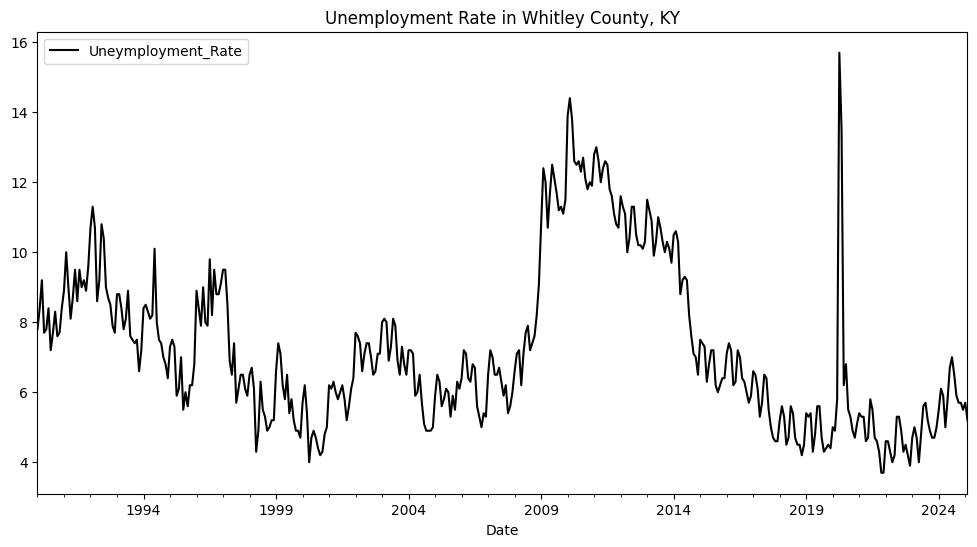

In [ ]:
#plot the unemployment rate in Whitley County, KY
plot_one = df.plot(x='Date', y='Uneymployment_Rate', title='Unemployment Rate in Whitley County, KY', figsize=(12, 6), color='black')